In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.maxcolumns',20)
pd.set_option('display.maxrows',25)

NameError: name 'warnings' is not defined

In [3]:
responses = pd.read_csv('../Niteo/Emergency_Response_Incidents.csv')

In [4]:
responses.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [5]:
responses['Incident Type'].describe()

count               2524
unique               284
top       Fire-2nd Alarm
freq                 203
Name: Incident Type, dtype: object

In [6]:
responses['Incident Type'].value_counts().head()

Fire-2nd Alarm                        203
Utility-Water Main                    175
LawEnforcement-Suspicious Package     132
Law Enforcement-Suspicious Package    129
Fire-1st Alarm                        109
Name: Incident Type, dtype: int64

In [7]:
responses[responses.Borough=='Bronx']['Incident Type'].value_counts()[:10]

Fire-2nd Alarm                        39
Fire-3rd Alarm                        23
Utility-Water Main                    22
Utility-Power Outage                  15
Utility-Other                         11
Utility-Water Service Line            11
Utility-Gas Service Line               9
Law Enforcement-Suspicious Package     8
HazMat-High Carbon Monoxide            7
Structural-Other                       7
Name: Incident Type, dtype: int64

In [8]:
pd.crosstab(responses['Incident Type'],responses.Borough)[:100]

Borough,Bronx,Brooklyn,Citywide,MANHATTAN,Manhattan,Queens,Staten Island,Staten island,bronx,manhattan,queens,staten island
Incident Type,,,,,,,,,,,,
Administration-1 PP Activation,0,0,0,0,2,0,0,0,0,0,0,0
Administration-Drill,0,1,0,0,3,2,0,0,0,0,0,0
Administration-Injured CIC,0,1,0,0,0,0,0,0,0,0,0,0
Administration-Meeting,0,0,0,0,1,2,0,0,0,0,0,0
Administration-Mutual Aid,0,2,0,0,0,0,0,0,0,0,0,0
Administration-Other,0,4,0,0,0,0,0,0,0,0,0,0
Administration-Planned Event,2,6,2,0,7,4,0,0,0,0,0,0
Administration-Planned Notify NYC Message,0,0,0,0,0,1,0,0,0,0,0,0
Administration-Watch Commander In Hospital,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
responses.sample(30)

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
1423,Structural-Collapse,NaN,Staten Island,6/18/2014 4:36:47 AM,6/24/2014 7:10:09PM,NaN,NaN
881,Fire-2nd Alarm,NaN,Brooklyn,2/12/2015 11:45:39 PM,2/13/2015 4:35:09AM,NaN,NaN
2204,HazMat-High Carbon Monoxide,560 Blake Avenue,Brooklyn,6/30/2013 5:59:29 AM,6/30/2013 2:03:07PM,40.667302,-73.898373
1425,Law Enforcement-Device,89-23 168 Place,Queens,6/17/2014 4:40:30 PM,6/17/2014 7:27:28PM,40.708662,-73.792894
1349,Fire-5th Alarm,862 Hunts Point Ave,Bronx,7/25/2014 1:07:09 AM,7/26/2014 9:55:46AM,40.818016,-73.888797
689,Law Enforcement-Suspicious Package,NaN,Brooklyn,4/8/2015 8:50:19 PM,4/8/2015 9:19:47PM,NaN,NaN
1017,Fire-2nd Alarm,210 Skillman Street,Brooklyn,12/20/2014 8:28:39 AM,12/20/2014 1:23:42PM,40.691913,-73.956591
243,Fire-1st Alarm,543 Southern Boulevard,Bronx,9/24/2015 6:48:13 AM,9/24/2015 8:19:26AM,40.812296,-73.903610
2142,Rescue-Technical,184 Joralemon Street,Brooklyn,7/26/2013 12:24:56 PM,7/26/2013 12:59:27PM,40.692670,-73.991901
35,Structural-Collapse,272 West 86 Street,Manhattan,12/15/2015 8:34:36 AM,12/15/2015 9:55:09AM,40.788658,-73.977350


In [10]:
test = responses.loc[0::,['Borough','Creation Date']]

In [11]:
test = test.replace(['manhattan','bronx','queens','Staten island','MANHATTAN','staten island'],['Manhattan','Bronx','Queens','Staten Island','Manhattan','Staten Island'])

In [12]:
test

,Borough,Creation Date
0,Brooklyn,12/31/2015 11:52:18 PM
1,Brooklyn,12/31/2015 5:00:43 PM
2,Brooklyn,12/30/2015 1:55:21 PM
3,Bronx,12/29/2015 1:57:37 PM
4,Manhattan,12/28/2015 6:52:05 PM
5,Brooklyn,12/28/2015 1:46:20 AM
6,Queens,12/27/2015 4:47:41 PM
7,Manhattan,12/26/2015 7:28:35 PM
8,Manhattan,12/25/2015 9:17:57 PM
9,Manhattan,12/25/2015 8:50:22 AM


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 2 columns):
Borough          2524 non-null object
Creation Date    2524 non-null object
dtypes: object(2)
memory usage: 39.5+ KB


In [14]:
test = test.rename(columns={'Creation Date':'Date'})

In [15]:
test.head()

,Borough,Date
0,Brooklyn,12/31/2015 11:52:18 PM
1,Brooklyn,12/31/2015 5:00:43 PM
2,Brooklyn,12/30/2015 1:55:21 PM
3,Bronx,12/29/2015 1:57:37 PM
4,Manhattan,12/28/2015 6:52:05 PM


In [16]:
test['Date'] = pd.to_datetime(test.Date)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 2 columns):
Borough    2524 non-null object
Date       2524 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 39.5+ KB


In [18]:
test['month']=test.Date.dt.month

In [19]:
test.head()

,Borough,Date,month
0,Brooklyn,2015-12-31 23:52:18,12
1,Brooklyn,2015-12-31 17:00:43,12
2,Brooklyn,2015-12-30 13:55:21,12
3,Bronx,2015-12-29 13:57:37,12
4,Manhattan,2015-12-28 18:52:05,12


In [88]:
test.sample(5)

,Borough,Date,month
1391,Manhattan,2014-07-03 12:00:01,7
876,Manhattan,2015-02-14 06:37:07,2
1853,Queens,2013-12-17 11:37:18,12
1057,Queens,2014-12-08 05:00:54,12
1500,Manhattan,2014-05-12 15:51:25,5


In [114]:
test['day']=test.Date.dt.day

In [96]:
test.head()

,Borough,Date,month,day
0,Brooklyn,2015-12-31 23:52:18,12,31
1,Brooklyn,2015-12-31 17:00:43,12,31
2,Brooklyn,2015-12-30 13:55:21,12,30
3,Bronx,2015-12-29 13:57:37,12,29
4,Manhattan,2015-12-28 18:52:05,12,28


In [107]:
test

,Borough,Date,month,day
0,Brooklyn,2015-12-31 23:52:18,12,31
1,Brooklyn,2015-12-31 17:00:43,12,31
2,Brooklyn,2015-12-30 13:55:21,12,30
3,Bronx,2015-12-29 13:57:37,12,29
4,Manhattan,2015-12-28 18:52:05,12,28
5,Brooklyn,2015-12-28 01:46:20,12,28
6,Queens,2015-12-27 16:47:41,12,27
7,Manhattan,2015-12-26 19:28:35,12,26
8,Manhattan,2015-12-25 21:17:57,12,25
9,Manhattan,2015-12-25 08:50:22,12,25


In [115]:
testgrp=test.groupby(['month','Borough'])

In [119]:
testgrp.size()

month  Borough      
1      Bronx            34
       Brooklyn         54
       Manhattan        88
       Queens           44
       Staten Island     9
2      Bronx            26
       Brooklyn         55
       Manhattan        69
       Queens           48
       Staten Island     6
3      Bronx            31
       Brooklyn         58
       Manhattan        80
       Queens           32
       Staten Island    14
4      Bronx            24
       Brooklyn         65
       Citywide          2
       Manhattan        66
       Queens           37
       Staten Island     9
5      Bronx            28
       Brooklyn         48
       Manhattan        83
       Queens           40
       Staten Island    23
6      Bronx            21
       Brooklyn         70
       Manhattan        69
       Queens           41
                        ..
7      Staten Island    15
8      Bronx            20
       Brooklyn         51
       Manhattan        68
       Queens           23
       

In [129]:
dummy=testgrp.size().unstack('Borough')

In [130]:
dummy

Borough,Bronx,Brooklyn,Citywide,Manhattan,Queens,Staten Island
month,,,,,,
1,34.0,54.0,NaN,88.0,44.0,9.0
2,26.0,55.0,NaN,69.0,48.0,6.0
3,31.0,58.0,NaN,80.0,32.0,14.0
4,24.0,65.0,2.0,66.0,37.0,9.0
5,28.0,48.0,NaN,83.0,40.0,23.0
6,21.0,70.0,NaN,69.0,41.0,12.0
7,34.0,65.0,NaN,93.0,27.0,15.0
8,20.0,51.0,NaN,68.0,23.0,15.0
9,23.0,37.0,1.0,77.0,27.0,15.0


In [136]:
dummy['total']=dummy['Bronx']+dummy['Brooklyn']+dummy['Manhattan']+dummy['Queens']+dummy['Staten Island']

In [137]:
dummy

Borough,Bronx,Brooklyn,Citywide,Manhattan,Queens,Staten Island,total
month,,,,,,,
1,34.0,54.0,NaN,88.0,44.0,9.0,229.0
2,26.0,55.0,NaN,69.0,48.0,6.0,204.0
3,31.0,58.0,NaN,80.0,32.0,14.0,215.0
4,24.0,65.0,2.0,66.0,37.0,9.0,201.0
5,28.0,48.0,NaN,83.0,40.0,23.0,222.0
6,21.0,70.0,NaN,69.0,41.0,12.0,213.0
7,34.0,65.0,NaN,93.0,27.0,15.0,234.0
8,20.0,51.0,NaN,68.0,23.0,15.0,177.0
9,23.0,37.0,1.0,77.0,27.0,15.0,179.0


Borough,Bronx,Brooklyn,Citywide,Manhattan,Queens,Staten Island,total
Borough,,,,,,,
Bronx,1.000000,0.185707,-0.461084,0.825344,0.063916,0.171804,0.774010
Brooklyn,0.185707,1.000000,0.537186,0.041731,0.240735,-0.219470,0.607833
Citywide,-0.461084,0.537186,1.000000,-0.309763,0.148266,-0.552771,0.119436
Manhattan,0.825344,0.041731,-0.309763,1.000000,-0.142310,0.408162,0.702187
Queens,0.063916,0.240735,0.148266,-0.142310,1.000000,-0.538072,0.385570
Staten Island,0.171804,-0.219470,-0.552771,0.408162,-0.538072,1.000000,0.118474
total,0.774010,0.607833,0.119436,0.702187,0.385570,0.118474,1.000000


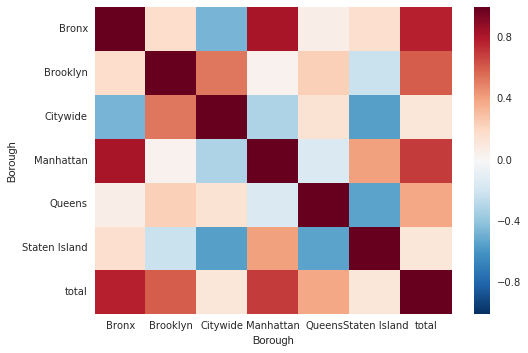

In [264]:
import seaborn as sns

sns.heatmap(dummy.corr())

dummy.corr()


In [138]:
dummy['total'].max()

237.0

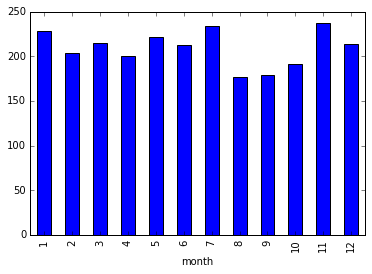

In [139]:
dummy['total'].plot(kind='bar')

In [140]:
responses.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [141]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
Incident Type    2524 non-null object
Location         2295 non-null object
Borough          2524 non-null object
Creation Date    2524 non-null object
Closed Date      2524 non-null object
Latitude         2238 non-null float64
Longitude        2238 non-null float64
dtypes: float64(2), object(5)
memory usage: 138.1+ KB


In [145]:
testinc = responses.loc[0::,['Incident Type','Borough']]

In [201]:
testinc = testinc.replace(['manhattan','bronx','queens','Staten island','MANHATTAN','staten island'],['Manhattan','Bronx','Queens','Staten Island','Manhattan','Staten Island'])

In [202]:
testinc.sample(20)

,Incidents,Borough
1721,Structural,Queens
2211,Administration,Manhattan
1610,Fire,Bronx
1425,Law Enforcement,Queens
38,Structural,Brooklyn
1089,Law Enforcement,Brooklyn
2390,Utility,Brooklyn
365,Utility,Manhattan
2232,Structural,Bronx
1912,Transportation,Queens


In [203]:
testinc = testinc.rename(columns ={'Incident Type':'Incidents'})

In [204]:
testinc.head()

,Incidents,Borough
0,Administration,Brooklyn
1,Transportation,Brooklyn
2,Law Enforcement,Brooklyn
3,Fire,Bronx
4,Fire,Manhattan


In [188]:
str1 ='Administration-Other'

In [191]:
str1.split('-')[0]

'Administration'

In [205]:
def cleaninc(x):
    x=x.split('-')
    return x[0]
testinc['Incidents']=testinc.Incidents.apply(cleaninc)

In [211]:
testinc = testinc.replace(['LawEnforcement'],['Law Enforcement'])

In [212]:
testinc.head()

,Incidents,Borough
0,Administration,Brooklyn
1,Transportation,Brooklyn
2,Law Enforcement,Brooklyn
3,Fire,Bronx
4,Fire,Manhattan


In [213]:
incgrp = testinc.groupby(['Borough','Incidents'])

In [214]:
incgrp.size().unstack('Incidents')

Incidents,Administration,Aviation,Fire,HazMat,Law Enforcement,Marine,Medical,Other,Power Outage,Rescue,Structural,Transportation,Utility,Weather
Borough,,,,,,,,,,,,,,
Bronx,2.0,1.0,119.0,22.0,23.0,NaN,5.0,1.0,NaN,7.0,47.0,3.0,87.0,1.0
Brooklyn,15.0,NaN,202.0,55.0,89.0,3.0,12.0,2.0,NaN,13.0,119.0,26.0,138.0,4.0
Citywide,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Manhattan,13.0,3.0,226.0,58.0,165.0,7.0,7.0,6.0,NaN,48.0,149.0,48.0,188.0,NaN
Queens,9.0,10.0,134.0,43.0,64.0,2.0,6.0,1.0,NaN,10.0,59.0,21.0,95.0,4.0
Staten Island,NaN,1.0,46.0,7.0,23.0,2.0,2.0,1.0,1.0,3.0,17.0,4.0,37.0,1.0


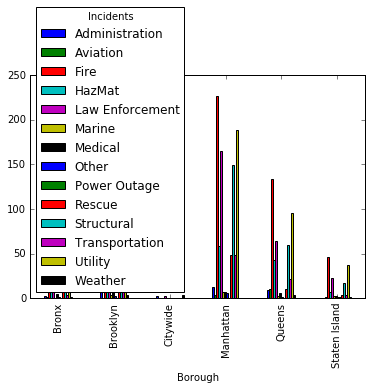

In [215]:
incgrp.size().unstack('Incidents').plot(kind='bar')

In [218]:
responses.sample(30)

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
681,Administration-Planned Event,East 161st Street & River Avenue,Bronx,4/11/2015 3:24:43 AM,4/13/2015 1:12:58AM,40.827673,-73.926018
44,Fire-6th Alarm,2086 Valentine Avenue,Bronx,12/10/2015 11:57:08 PM,Active,40.852848,-73.899854
453,Utility-Manhole,NaN,Brooklyn,6/29/2015 5:29:29 AM,6/29/2015 5:29:41AM,NaN,NaN
1696,Utility-Steam Service Line,335 East 10 Street,Manhattan,2/5/2014 10:51:46 AM,2/5/2014 11:47:24AM,40.727151,-73.980561
859,Utility-Water Service Line,3692 Nostrand Ave,Brooklyn,2/18/2015 11:12:35 AM,2/18/2015 12:54:37PM,40.593925,-73.940646
2079,Utility-Water Main,North Conduit Blvd & Rockaway Blvd,Queens,8/29/2013 12:44:00 AM,8/29/2013 4:00:03PM,40.667522,-73.780625
2162,Rescue-Water,20 Rewe Street,Brooklyn,7/17/2013 5:19:51 AM,7/17/2013 6:30:35AM,40.716288,-73.931190
2198,HazMat-Chemical,300 Western Avenue,Staten Island,7/2/2013 11:30:49 AM,7/2/2013 12:48:04PM,40.633754,-74.182518
340,Utility-Water Main,2075 Creston Ave,Bronx,8/6/2015 8:48:07 PM,8/7/2015 3:14:30AM,40.853500,-73.904154
1886,Transportation-Train Elevated,W 225 St & Marble Hill Ave,Bronx,12/1/2013 7:42:47 AM,12/6/2013 4:44:48AM,40.874661,-73.911088


In [219]:
responses.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [220]:
test.head()

,Borough,Date,month,day
0,Brooklyn,2015-12-31 23:52:18,12,31
1,Brooklyn,2015-12-31 17:00:43,12,31
2,Brooklyn,2015-12-30 13:55:21,12,30
3,Bronx,2015-12-29 13:57:37,12,29
4,Manhattan,2015-12-28 18:52:05,12,28


In [221]:
testinc.head()

,Incidents,Borough
0,Administration,Brooklyn
1,Transportation,Brooklyn
2,Law Enforcement,Brooklyn
3,Fire,Bronx
4,Fire,Manhattan


In [226]:
testut = response.loc[0::,['Incident Type','Borough','Creation Date']]

In [227]:
testut.head()

,Incident Type,Borough,Creation Date
0,Administration-Other,Brooklyn,12/31/2015 11:52:18 PM
1,Transportation-Train Subway,Brooklyn,12/31/2015 5:00:43 PM
2,Law Enforcement-Suspicious Package,Brooklyn,12/30/2015 1:55:21 PM
3,Fire-Manhole,Bronx,12/29/2015 1:57:37 PM
4,Fire-2nd Alarm,Manhattan,12/28/2015 6:52:05 PM


In [229]:
testut = testut.rename(columns ={'Incident Type':'Incidents'})

In [230]:
testut.head()

,Incidents,Borough,Creation Date
0,Administration-Other,Brooklyn,12/31/2015 11:52:18 PM
1,Transportation-Train Subway,Brooklyn,12/31/2015 5:00:43 PM
2,Law Enforcement-Suspicious Package,Brooklyn,12/30/2015 1:55:21 PM
3,Fire-Manhole,Bronx,12/29/2015 1:57:37 PM
4,Fire-2nd Alarm,Manhattan,12/28/2015 6:52:05 PM


In [231]:
testut = testut.rename(columns ={'Creation Date':'Date'})

In [232]:
testut.head()

,Incidents,Borough,Date
0,Administration-Other,Brooklyn,12/31/2015 11:52:18 PM
1,Transportation-Train Subway,Brooklyn,12/31/2015 5:00:43 PM
2,Law Enforcement-Suspicious Package,Brooklyn,12/30/2015 1:55:21 PM
3,Fire-Manhole,Bronx,12/29/2015 1:57:37 PM
4,Fire-2nd Alarm,Manhattan,12/28/2015 6:52:05 PM


In [235]:
testut = testut.replace(['manhattan','bronx','queens','Staten island','MANHATTAN','staten island'],['Manhattan','Bronx','Queens','Staten Island','Manhattan','Staten Island'])

In [236]:
def cleaninc(x):
    x=x.split('-')
    return x[0]
testut['Incidents']=testut.Incidents.apply(cleaninc)

In [237]:
testut.head()

,Incidents,Borough,Date
0,Administration,Brooklyn,12/31/2015 11:52:18 PM
1,Transportation,Brooklyn,12/31/2015 5:00:43 PM
2,Law Enforcement,Brooklyn,12/30/2015 1:55:21 PM
3,Fire,Bronx,12/29/2015 1:57:37 PM
4,Fire,Manhattan,12/28/2015 6:52:05 PM


In [239]:
testut = testut.replace(['LawEnforcement'],['Law Enforcement'])

In [240]:
testut['Date'] = pd.to_datetime(testut.Date)

In [241]:
testut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 3 columns):
Incidents    2524 non-null object
Borough      2524 non-null object
Date         2524 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 59.2+ KB


In [242]:
testut['month']=testut.Date.dt.month

In [243]:
testut.head()

,Incidents,Borough,Date,month
0,Administration,Brooklyn,2015-12-31 23:52:18,12
1,Transportation,Brooklyn,2015-12-31 17:00:43,12
2,Law Enforcement,Brooklyn,2015-12-30 13:55:21,12
3,Fire,Bronx,2015-12-29 13:57:37,12
4,Fire,Manhattan,2015-12-28 18:52:05,12


In [244]:
testut.sample(5)

,Incidents,Borough,Date,month
1879,Fire,Manhattan,2013-12-04 15:40:50,12
253,Law Enforcement,Manhattan,2015-09-20 19:14:34,9
2496,Fire,Manhattan,2013-01-23 20:39:51,1
932,Fire,Manhattan,2015-01-25 15:07:05,1
750,Fire,Manhattan,2015-03-18 02:21:15,3


In [246]:
utset=testut[testut.Incidents=='Utility']

In [247]:
utset

,Incidents,Borough,Date,month
10,Utility,Brooklyn,2015-12-24 19:00:06,12
16,Utility,Brooklyn,2015-12-22 10:16:36,12
27,Utility,Bronx,2015-12-18 03:34:44,12
28,Utility,Bronx,2015-12-17 21:08:07,12
32,Utility,Queens,2015-12-16 06:01:01,12
39,Utility,Manhattan,2015-12-14 08:32:47,12
48,Utility,Manhattan,2015-12-08 11:06:44,12
66,Utility,Brooklyn,2015-12-02 12:16:37,12
79,Utility,Manhattan,2015-11-27 07:47:40,11
85,Utility,Brooklyn,2015-11-25 20:01:26,11


In [248]:
utgrp=utset.groupby(['month','Borough'])

In [252]:
utgrp.size().unstack('Borough')

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
month,,,,,
1,14.0,14.0,30.0,12.0,5.0
2,8.0,21.0,22.0,14.0,3.0
3,7.0,18.0,19.0,5.0,5.0
4,7.0,7.0,13.0,5.0,1.0
5,8.0,8.0,10.0,6.0,1.0
6,5.0,12.0,9.0,6.0,5.0
7,13.0,15.0,18.0,8.0,8.0
8,4.0,6.0,9.0,5.0,1.0
9,9.0,4.0,16.0,9.0,5.0


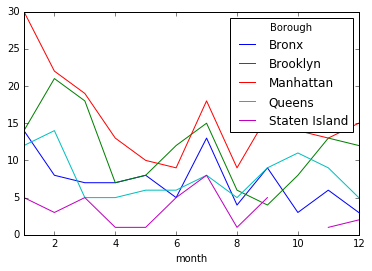

In [259]:
utgrp.size().unstack('Borough').plot(kind='line')

In [1]:
responses.head()

NameError: name 'responses' is not defined

In [20]:
responses.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [22]:
responses['Borough']=responses.Borough.apply(lambda x:x.lower())

In [25]:
responses=responses.rename(columns={'Incident Type':'Type','Creation Date':'SDate','Closed Date':'EDate'})

In [26]:
responses.head()

,Type,Location,Borough,SDate,EDate,Latitude,Longitude
0,Administration-Other,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [27]:
df=responses.copy()

In [32]:
df['Type']=df.Type.apply(lambda x:x.lower())

In [33]:
def Idetails(x):
    x=x.split('-')
    x=x[-1]
    return x
df['Details']=df.Type.apply(Idetails)

In [34]:
df.head()

,Type,Location,Borough,SDate,EDate,Latitude,Longitude,Details
0,administration,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN,administration
1,transportation,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904,transportation
2,law enforcement,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045,law enforcement
3,fire,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169,fire
4,fire,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568,fire


In [31]:
def Type(x):
    x=x.split('-')
    x=x[0]
    return x
df['Type']=df.Type.apply(Type)

In [36]:
df=responses.copy()

In [37]:
df.head()

,Type,Location,Borough,SDate,EDate,Latitude,Longitude
0,Administration-Other,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [38]:
df['Type']=df.Type.apply(lambda x:x.lower())

In [39]:
def Idetails(x):
    x=x.split('-')
    x=x[-1]
    return x
df['Details']=df.Type.apply(Idetails)

In [40]:
def Type(x):
    x=x.split('-')
    x=x[0]
    return x
df['Type']=df.Type.apply(Type)

In [41]:
df.head()

,Type,Location,Borough,SDate,EDate,Latitude,Longitude,Details
0,administration,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN,other
1,transportation,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904,train subway
2,law enforcement,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045,suspicious package
3,fire,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169,manhole
4,fire,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568,2nd alarm


In [42]:
df = df.replace(['lawenforcement'],['law enforcement'])

In [53]:
df['SDate']=pd.to_datetime(df.SDate)

In [44]:
df['Smonth']=df.SDate.dt.month

In [45]:
df.head()

,Type,Location,Borough,SDate,EDate,Latitude,Longitude,Details,Smonth
0,administration,NaN,brooklyn,2015-12-31 23:52:18,1/1/2016 1:32:08AM,NaN,NaN,other,12
1,transportation,Marcy Ave & Broadway,brooklyn,2015-12-31 17:00:43,1/2/2016 4:03:10AM,40.708426,-73.957904,train subway,12
2,law enforcement,435 Ocean Parkway,brooklyn,2015-12-30 13:55:21,12/30/2015 2:00:18PM,40.637832,-73.973045,suspicious package,12
3,fire,NaN,bronx,2015-12-29 13:57:37,12/30/2015 2:47:14AM,40.733883,-74.031169,manhole,12
4,fire,347 East 84 Street,manhattan,2015-12-28 18:52:05,12/28/2015 8:40:08PM,40.776093,-73.951568,2nd alarm,12


In [46]:
df['SYear']=df.SDate.dt.year

In [47]:
df['SHour']=df.SDate.dt.hour

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 11 columns):
Type         2524 non-null object
Location     2295 non-null object
Borough      2524 non-null object
SDate        2524 non-null datetime64[ns]
EDate        2524 non-null object
Latitude     2238 non-null float64
Longitude    2238 non-null float64
Details      2524 non-null object
Smonth       2524 non-null int64
SYear        2524 non-null int64
SHour        2524 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 217.0+ KB


In [51]:
df['EDate']=pd.to_datetime(df.EDate)

ValueError: Unknown string format

In [55]:
df.EDate.describe()

count       2524
unique      2519
top       Active
freq           4
Name: EDate, dtype: object

In [56]:
df = df[df.EDate != 'Active']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 2523
Data columns (total 11 columns):
Type         2520 non-null object
Location     2291 non-null object
Borough      2520 non-null object
SDate        2520 non-null datetime64[ns]
EDate        2520 non-null object
Latitude     2234 non-null float64
Longitude    2234 non-null float64
Details      2520 non-null object
Smonth       2520 non-null int64
SYear        2520 non-null int64
SHour        2520 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 236.2+ KB


In [58]:
df['EDate']=pd.to_datetime(df.EDate)

In [59]:
df['EMonth']=df.EDate.dt.month
df['EYear']=df.EDate.dt.year
df['EHour']=df.EDate.dt.hour

In [60]:
df.head()

,Type,Location,Borough,SDate,EDate,Latitude,Longitude,Details,Smonth,SYear,SHour,EMonth,EYear,EHour
0,administration,NaN,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,NaN,NaN,other,12,2015,23,1,2016,1
1,transportation,Marcy Ave & Broadway,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,40.708426,-73.957904,train subway,12,2015,17,1,2016,4
2,law enforcement,435 Ocean Parkway,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,40.637832,-73.973045,suspicious package,12,2015,13,12,2015,14
3,fire,NaN,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,40.733883,-74.031169,manhole,12,2015,13,12,2015,2
4,fire,347 East 84 Street,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,40.776093,-73.951568,2nd alarm,12,2015,18,12,2015,20


In [66]:
del df['Longitude']

In [67]:
df.head()

,Type,Location,Borough,SDate,EDate,Details,Smonth,SYear,SHour,EMonth,EYear,EHour
0,administration,NaN,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,other,12,2015,23,1,2016,1
1,transportation,Marcy Ave & Broadway,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,train subway,12,2015,17,1,2016,4
2,law enforcement,435 Ocean Parkway,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,suspicious package,12,2015,13,12,2015,14
3,fire,NaN,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,manhole,12,2015,13,12,2015,2
4,fire,347 East 84 Street,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,2nd alarm,12,2015,18,12,2015,20


In [69]:
df['SDay']=df.SDate.dt.dayofweek
df['EDay']=df.EDate.dt.dayofweek

In [70]:
df['CloseDays']=abs(df.SDate-df.EDate)

In [71]:
df.head()

,Type,Location,Borough,SDate,EDate,Details,Smonth,SYear,SHour,EMonth,EYear,EHour,SDay,EDay,CloseDays
0,administration,NaN,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,other,12,2015,23,1,2016,1,3,4,0 days 01:39:50
1,transportation,Marcy Ave & Broadway,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,train subway,12,2015,17,1,2016,4,3,5,1 days 11:02:27
2,law enforcement,435 Ocean Parkway,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,suspicious package,12,2015,13,12,2015,14,2,2,0 days 00:04:57
3,fire,NaN,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,manhole,12,2015,13,12,2015,2,1,2,0 days 12:49:37
4,fire,347 East 84 Street,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,2nd alarm,12,2015,18,12,2015,20,0,0,0 days 01:48:03


In [75]:
df['CloseDays']=df.CloseDays.dt.days

In [76]:
df.head()

,Type,Location,Borough,SDate,EDate,Details,Smonth,SYear,SHour,EMonth,EYear,EHour,SDay,EDay,CloseDays
0,administration,NaN,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,other,12,2015,23,1,2016,1,3,4,0
1,transportation,Marcy Ave & Broadway,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,train subway,12,2015,17,1,2016,4,3,5,1
2,law enforcement,435 Ocean Parkway,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,suspicious package,12,2015,13,12,2015,14,2,2,0
3,fire,NaN,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,manhole,12,2015,13,12,2015,2,1,2,0
4,fire,347 East 84 Street,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,2nd alarm,12,2015,18,12,2015,20,0,0,0


In [89]:
df.Details.describe()

count    2520.000000
mean      118.254762
std        81.617803
min         0.000000
25%        42.000000
50%       124.000000
75%       197.000000
max       248.000000
Name: Details, dtype: float64

In [77]:
del df['Location']

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 2523
Data columns (total 14 columns):
Type         2520 non-null object
Borough      2520 non-null object
SDate        2520 non-null datetime64[ns]
EDate        2520 non-null datetime64[ns]
Details      2520 non-null object
Smonth       2520 non-null int64
SYear        2520 non-null int64
SHour        2520 non-null int64
EMonth       2520 non-null int64
EYear        2520 non-null int64
EHour        2520 non-null int64
SDay         2520 non-null int64
EDay         2520 non-null int64
CloseDays    2520 non-null int64
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 295.3+ KB


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [83]:
var_mod=['Type','Borough','Details']

In [84]:
for var in var_mod:
    lb = LabelEncoder()
    full_var_data = df[var].astype('str')
    temp = lb.fit_transform(np.array(full_var_data))
    df[var] = lb.transform(np.array( df[var] ).astype('str'))  

In [85]:
df.head()

,Type,Borough,SDate,EDate,Details,Smonth,SYear,SHour,EMonth,EYear,EHour,SDay,EDay,CloseDays
0,0,1,2015-12-31 23:52:18,2016-01-01 01:32:08,143,12,2015,23,1,2016,1,3,4,0
1,3,1,2015-12-31 17:00:43,2016-01-02 04:03:10,213,12,2015,17,1,2016,4,3,5,1
2,8,1,2015-12-30 13:55:21,2015-12-30 14:00:18,204,12,2015,13,12,2015,14,2,2,0
3,6,0,2015-12-29 13:57:37,2015-12-30 02:47:14,124,12,2015,13,12,2015,2,1,2,0
4,6,3,2015-12-28 18:52:05,2015-12-28 20:40:08,3,12,2015,18,12,2015,20,0,0,0


In [93]:
columns = ['Type','Borough','SDate','EDate','Details','Smonth','SYear','SHour','EMonth','EYear','EHour','SDay','EDay','CloseDays']

In [94]:
df.columns = columns

In [122]:
predictors = ['Details','Smonth','SYear','SHour','EMonth','EYear','EHour','SDay','EDay','CloseDays']

In [123]:
x_train,x_test,y_train,y_test = train_test_split(df[predictors],df.Borough,test_size=0.3)

In [124]:
dt=DecisionTreeClassifier()

In [125]:
model=dt.fit(x_train,y_train)

In [126]:
result = cross_val_score(dt,x_train,y_train,cv=7)
result

array([ 0.28627451,  0.28627451,  0.29249012,  0.27888446,  0.27091633,
        0.328     ,  0.27309237])

In [119]:
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.2857142857142857

In [120]:
print classification_report(pred,y_test)

             precision    recall  f1-score   support

          0       0.21      0.15      0.17       123
          1       0.27      0.29      0.28       202
          2       0.00      0.00      0.00         0
          3       0.38      0.43      0.40       259
          4       0.17      0.17      0.17       120
          5       0.17      0.13      0.15        52

avg / total       0.28      0.29      0.28       756



C:\Users\amuthiyan\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
